## Sales Analysis
### Key Findings:
- **Top Supplier**: "REPUBLIC NATIONAL DISTRIBUTING CO".
- **Negative Sales**: Found 716 entries with negative warehouse sales (likely returns).
- **Conclusions**: Wine is the top-selling category accounting for 61.0% and Liqour comes second at 21.8%.
- **From the monthly sales data, we can infer that:
- **The highest single-month sale appears in July 2020 with WareHouse Sales accounting for 70.2% of total sales.
- **However, when comparing aggregated totals, the majority of the sales occurred in 2019.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [63]:
#Reads csv file via Pandas
data = pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [3]:
#Displays the first five rows
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
#Displays the last 5 rows
data.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
307640,2020,9,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.0,0.0,1.0
307641,2020,9,MILLER BREWING COMPANY,98540,PILSNER URQUELL 1/2K,KEGS,0.0,0.0,4.0
307642,2020,9,CONSTANTINE WINES INC,98930,ARIS GREEK LAGER 4/6NR - 11OZ,BEER,0.0,0.0,0.0
307643,2020,9,LEGENDS LTD,98949,SCHNEIDER WEISEN EDEL WEISS NR 20/CS - 16.9OZ,BEER,0.0,0.0,1.0
307644,2020,9,RELIABLE CHURCHILL LLLP,98981,AYINGER OKTOBERFEST NR 20/CS - 17OZ,BEER,1.6,0.0,10.0


In [5]:
## Get a summary of columns, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [7]:
# Returns the number of rows and columns
data.shape

(307645, 9)

In [8]:
#Summary Statistics
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [9]:
#Checking for missing values
data.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [11]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [13]:
data.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [20]:
pd.DataFrame(data)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.00,0.0,1.0
307641,2020,9,MILLER BREWING COMPANY,98540,PILSNER URQUELL 1/2K,KEGS,0.00,0.0,4.0
307642,2020,9,CONSTANTINE WINES INC,98930,ARIS GREEK LAGER 4/6NR - 11OZ,BEER,0.00,0.0,0.0
307643,2020,9,LEGENDS LTD,98949,SCHNEIDER WEISEN EDEL WEISS NR 20/CS - 16.9OZ,BEER,0.00,0.0,1.0


In [26]:
data = pd.DataFrame(data=data)
data


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.00,0.0,1.0
307641,2020,9,MILLER BREWING COMPANY,98540,PILSNER URQUELL 1/2K,KEGS,0.00,0.0,4.0
307642,2020,9,CONSTANTINE WINES INC,98930,ARIS GREEK LAGER 4/6NR - 11OZ,BEER,0.00,0.0,0.0
307643,2020,9,LEGENDS LTD,98949,SCHNEIDER WEISEN EDEL WEISS NR 20/CS - 16.9OZ,BEER,0.00,0.0,1.0


In [34]:
print(data.columns)

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')


In [36]:
data['SUPPLIER'] = data['SUPPLIER'].replace('', 'Unknown')


In [37]:
# Check the column names
print("Column names:", data.columns)

Column names: Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')


In [61]:
# Checking for Negative Sales
negative_warehouse = data[data['WAREHOUSE SALES'] < 0]
print("\nNegative WAREHOUSE SALES entries:")
print(negative_warehouse)


Negative WAREHOUSE SALES entries:
        YEAR  MONTH                           SUPPLIER ITEM CODE  \
407     2020      1                                NaN      1279   
824     2020      1           PREMIUM DISTRIBUTORS INC       175   
1013    2020      1                 ANHEUSER BUSCH INC       205   
1554    2020      1                    FIVE GRAPES LLC    236502   
2146    2020      1                        LEGENDS LTD     25049   
...      ...    ...                                ...       ...   
301360  2020      9  PRESTIGE BEVERAGE GROUP OF MD LLC    336340   
303017  2020      9                       HEINEKEN USA     37015   
304511  2020      9                  YUENGLING BREWERY     51148   
304855  2020      9         DELMAR BREWING COMPANY LLC     62550   
305280  2020      9                 ANHEUSER BUSCH INC     68742   

                                         ITEM DESCRIPTION ITEM TYPE  \
407                                 EMPTY WINE KEG - KEGS   DUNNAGE   
824   

In [39]:
 # Analyzing Categories PART 1 
print("\nTop 10 Suppliers:")
print(data['SUPPLIER'].value_counts().head(10))



Top 10 Suppliers:
REPUBLIC NATIONAL DISTRIBUTING CO       20995
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
MONSIEUR TOUTON SELECTION               10360
A VINTNERS SELECTIONS                    9994
BACCHUS IMPORTERS LTD                    9150
DIAGEO NORTH AMERICA INC                 7520
RELIABLE CHURCHILL LLLP                  6971
Name: SUPPLIER, dtype: int64


In [42]:
# Analyzing Categories PART 2
print("\nItem Type Distribution:")
print(data['ITEM TYPE'].value_counts())


Item Type Distribution:
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1908
STR_SUPPLIES       405
REF                127
DUNNAGE             95
Name: ITEM TYPE, dtype: int64


In [43]:
# Total Sales by Category
sales_columns = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
print("\nTotal Sales by Category:")
print(data[sales_columns].sum())


Total Sales by Category:
RETAIL SALES        2160899.37
RETAIL TRANSFERS    2133968.63
WAREHOUSE SALES     7781756.28
dtype: float64


In [69]:
# Given totals
retail_sales = 2160899.37
retail_transfers = 2133968.63
warehouse_sales = 7781756.28

# Format and print the totals as USD
print("Retail Sales: $" + format(retail_sales, ",.2f"))
print("Retail Transfers: $" + format(retail_transfers, ",.2f"))
print("Warehouse Sales: $" + format(warehouse_sales, ",.2f"))


Retail Sales: $2,160,899.37
Retail Transfers: $2,133,968.63
Warehouse Sales: $7,781,756.28


In [44]:
# Monthly Sales Trend
monthly_sales = data.groupby(['YEAR', 'MONTH'])[sales_columns].sum().reset_index()
print("\nMonthly Sales Summary:")
print(monthly_sales)


Monthly Sales Summary:
    YEAR  MONTH  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
0   2017      6      97357.26          94720.00        379390.83
1   2017      7      92625.29          89083.25        316853.29
2   2017      8      87111.78          89486.43        382186.69
3   2017      9      90452.60          85934.38        305440.53
4   2017     10      89236.96          93035.97        303714.91
5   2017     11      98316.19         103230.96        339305.66
6   2017     12     131634.49         121129.51        306957.22
7   2018      1      75791.77          74396.14        254517.67
8   2018      2      77804.13          79256.78        265008.52
9   2019      1      76100.53          76295.63        280381.24
10  2019      2      80113.54          72415.98        248587.68
11  2019      3      84441.04          91321.61        293260.72
12  2019      4      80342.58          83633.90        298840.87
13  2019      5      94953.10          88056.80        383791.58
1

In [68]:
# Extract July 2020 data (assuming monthly_sales DataFrame exists)
july2020 = monthly_sales[(monthly_sales['YEAR'] == 2020) & (monthly_sales['MONTH'] == 7)]

# Calculate the total sales for July 2020
total_sales_july = july2020['RETAIL SALES'].values[0] + \
                   july2020['RETAIL TRANSFERS'].values[0] + \
                   july2020['WAREHOUSE SALES'].values[0]

# Calculate the percentage for Warehouse Sales
warehouse_sales_july = july2020['WAREHOUSE SALES'].values[0]
percent_warehouse = (warehouse_sales_july / total_sales_july) * 100

print(f"Warehouse sales account for {percent_warehouse:.1f}% of total sales in July 2020.")


Warehouse sales account for 70.2% of total sales in July 2020.


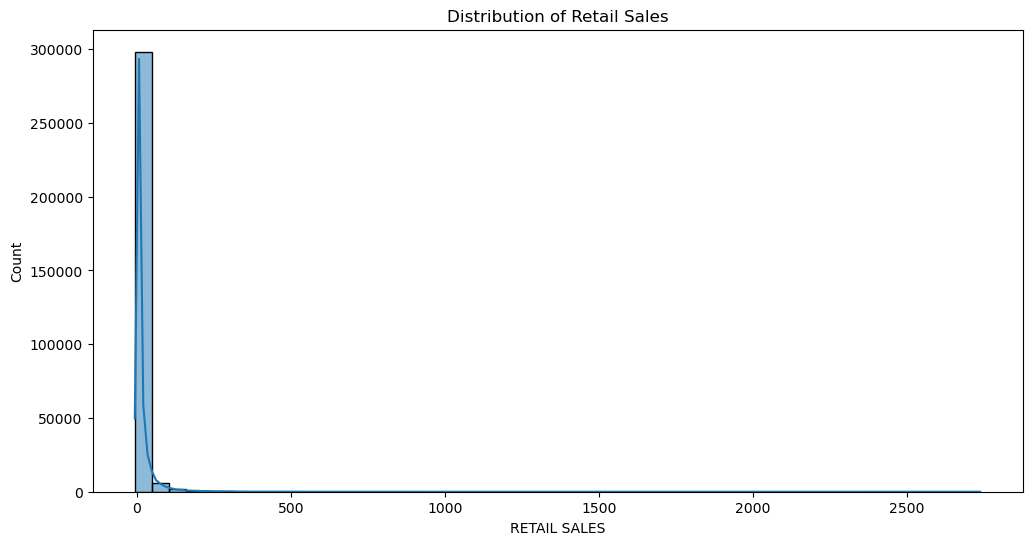

In [47]:
# Histogram Visualization of Retail Sales
plt.figure(figsize=(12, 6))
sns.histplot(data['RETAIL SALES'], bins=50, kde=True)
plt.title('Distribution of Retail Sales')
plt.show()

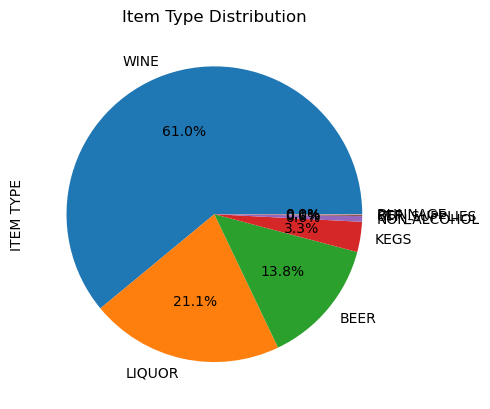

In [65]:
# Pie Chart of Item types
data['ITEM TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Item Type Distribution')
plt.show()

In [50]:
data['ITEM TYPE'].value_counts()



WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1908
STR_SUPPLIES       405
REF                127
DUNNAGE             95
Name: ITEM TYPE, dtype: int64

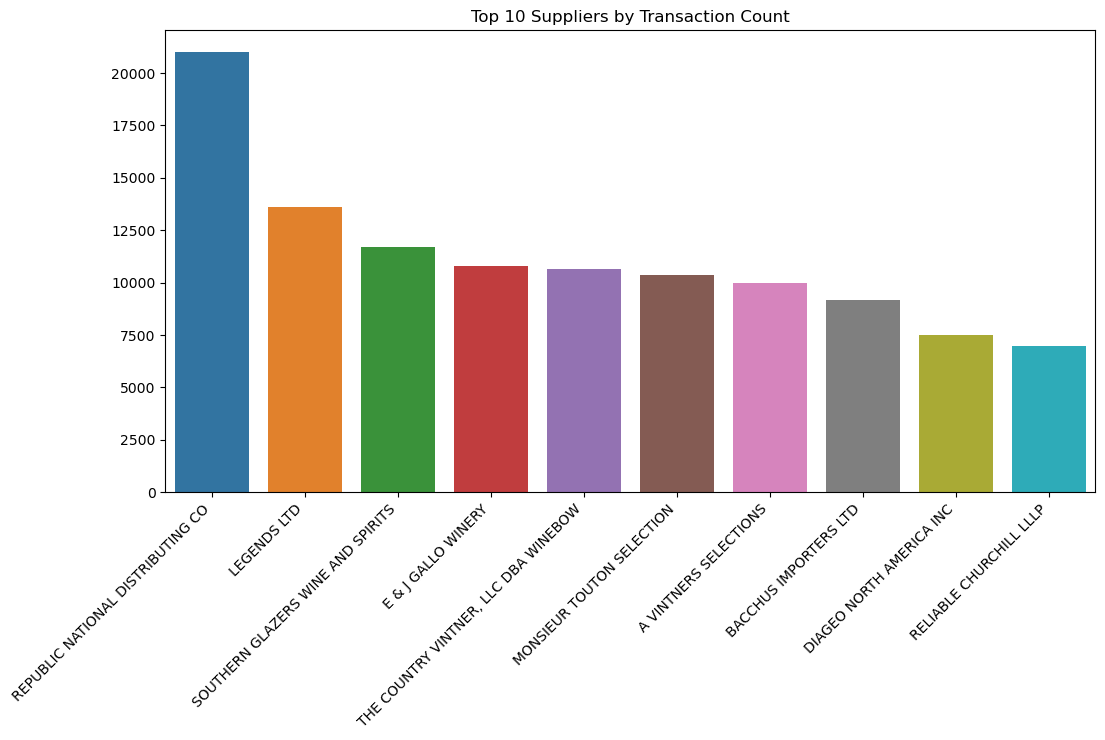

In [53]:
# Bar Plot of Top Suppliers
plt.figure(figsize=(12, 6))
sns.barplot(
    x=data['SUPPLIER'].value_counts().head(10).index,
    y=data['SUPPLIER'].value_counts().head(10).values
)
plt.title('Top 10 Suppliers by Transaction Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.show() 


In [66]:
# Create a 'Date' column from the YEAR and MONTH columns (using day=1 for each month)
monthly_sales['Date'] = pd.to_datetime(
    dict(year=monthly_sales['YEAR'], month=monthly_sales['MONTH'], day=1)
)


In [67]:
# Sort the DataFrame by Date (this ensures the line plot is in chronological order)
monthly_sales.sort_values('Date', inplace=True)


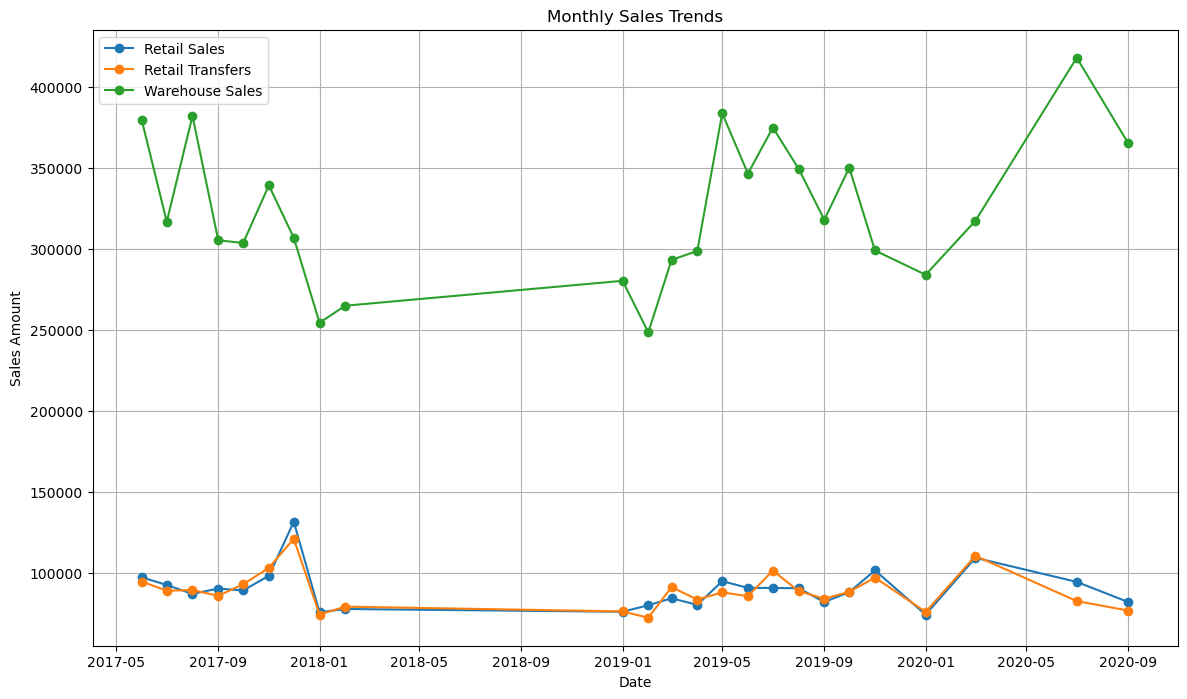

In [56]:
# Plot the monthly sales trends for each channel
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['Date'], monthly_sales['RETAIL SALES'], marker='o', label='Retail Sales')
plt.plot(monthly_sales['Date'], monthly_sales['RETAIL TRANSFERS'], marker='o', label='Retail Transfers')
plt.plot(monthly_sales['Date'], monthly_sales['WAREHOUSE SALES'], marker='o', label='Warehouse Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Monthly Sales Trends')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
corr_matrix = monthly_sales[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()


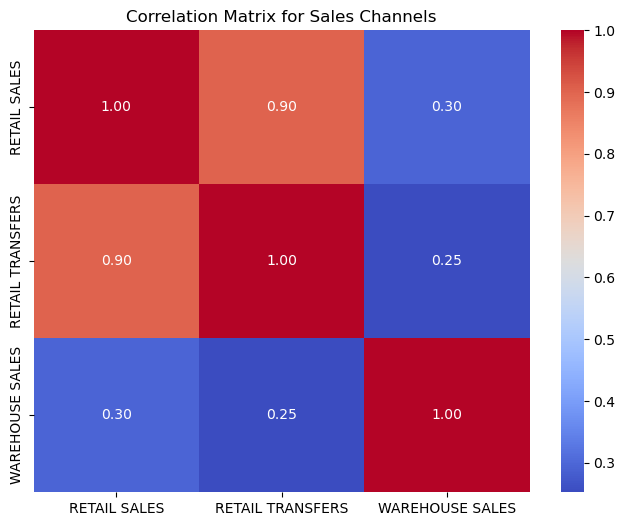

In [58]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Sales Channels')
plt.show()

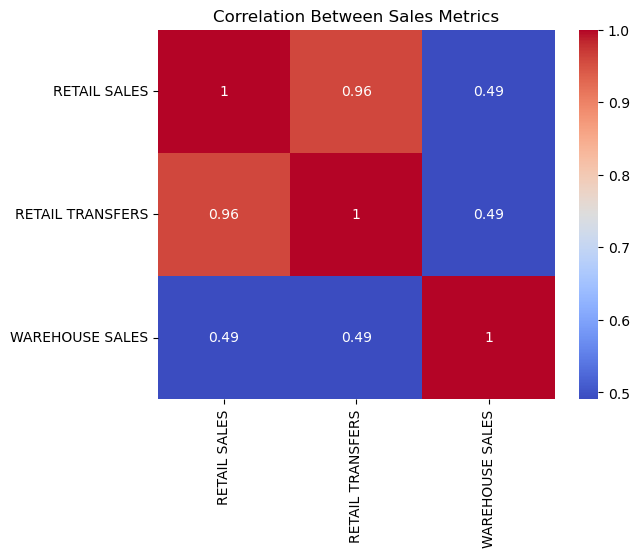

In [59]:
corr = data[sales_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales Metrics')
plt.show()


In [74]:
plt.savefig('Item Type Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>